In [120]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import regularizers
from keras.optimizers import Adam
from keras.optimizers import Adamax
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [114]:
df =  pd.read_csv("../../Data/DR3/espectros_normalizados_balanceados_SNG_1.csv")

In [115]:
df =  df.rename(columns={'col344': "id"})

In [116]:
df.dtypes

col1      float64
col2      float64
col3      float64
col4      float64
col5      float64
           ...   
col340    float64
col341    float64
col342    float64
col343    float64
id          int64
Length: 344, dtype: object

In [117]:
# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

In [118]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [119]:

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


In [121]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])
adamax = Adamax(learning_rate = 0.001)
# compilar el modelo
model.compile(optimizer=adamax,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [131]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               44032     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 3)               

In [123]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
38/38 [==============================] - 1s 12ms/step - loss: 0.8746 - accuracy: 0.6150 - val_loss: 0.6164 - val_accuracy: 0.7710
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 0.7029 - accuracy: 0.7304 - val_loss: 0.5179 - val_accuracy: 0.8122
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.7543 - val_loss: 0.4795 - val_accuracy: 0.8204
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 0.5917 - accuracy: 0.7786 - val_loss: 0.4546 - val_accuracy: 0.8237
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7824 - val_loss: 0.4375 - val_accuracy: 0.8303
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7960 - val_loss: 0.4213 - val_accuracy: 0.8435
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.8034 - val_loss: 0.4169 - val_accuracy: 0.8386
Epoch 8/50
38/38 [=

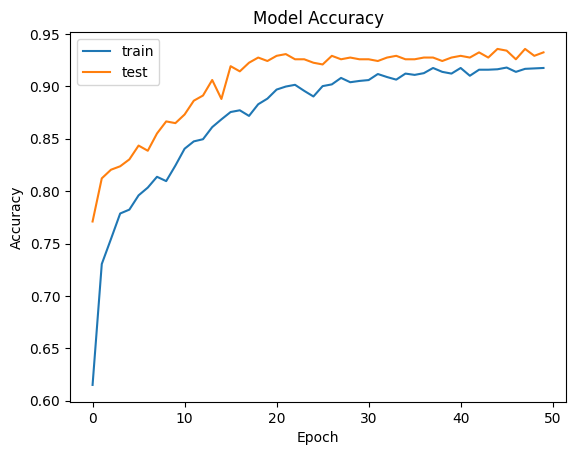

In [124]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [125]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [126]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 2ms/step
[[177   6   1]
 [ 12 173  13]
 [  4   5 216]]


In [127]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9171    0.9620    0.9390       184
           1     0.9402    0.8737    0.9058       198
           2     0.9391    0.9600    0.9495       225

    accuracy                         0.9325       607
   macro avg     0.9321    0.9319    0.9314       607
weighted avg     0.9328    0.9325    0.9320       607



In [128]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9324546952224053


In [129]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (2426, 343)
X_test:  (607, 343)
y_test:  607
y_pred:  607
